In [124]:
from cycler import L
from google.colab import files
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import io
import matplotlib.pyplot as plt
plt.style.use('seaborn-v0_8-colorblind')

SMALL_SIZE = 20
MEDIUM_SIZE = 20
BIGGER_SIZE = 22

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=MEDIUM_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=MEDIUM_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

marker = { "Beaver": 'x', "Amnis": 'o',"Coda": '*', "RStorm": '+', "Storm": '1'}

def draw_fig(data_latency, data_throughput=None, name=None):
    # draw latency
    etl_sys = [x for i, x in enumerate(data_latency) if i % 4 == 0]
    etl_taxi = [x for i, x in enumerate(data_latency) if i % 4 == 1]
    pred_sys = [x for i, x in enumerate(data_latency) if i % 4 == 2]
    pred_taxi = [x for i, x in enumerate(data_latency) if i % 4 == 3]
    steps = 5
    plt.figure(figsize=(8,5))
    x = range(0, len(etl_sys))
    plt.plot(x, etl_sys, label="ETL-SYS", marker='o')
    plt.plot(x, etl_taxi, label="ETL-TAXI", marker='x')
    plt.plot(x, pred_sys, label="PRED-SYS", marker='*')
    plt.plot(x, pred_taxi, label="PRED-TAXI", marker='+')
    #plt.ylim(0, 65, 10)
    plt.yscale('log')
    plt.legend(loc='upper right')
    plt.xlabel("minutes")
    plt.ylabel("95th Percentile Latency")
    if name:
        #plt.savefig(name+'.png', bbox_inches='tight')
        #files.download(name+'.png')
        pass
    plt.show()
    if not data_throughput:
        return
    # draw throughput
    plt.figure(figsize=(8,5))
    etl_sys = [x*20/1000 for i, x in enumerate(data_throughput) if i % 4 == 0]
    etl_taxi = [x /1000 for i, x in enumerate(data_throughput) if i % 4 == 1]
    pred_sys = [x*20/1000 for i, x in enumerate(data_throughput) if i % 4 == 2]
    pred_taxi = [x/1000 for i, x in enumerate(data_throughput) if i % 4 == 3]

    plt.plot(x, etl_sys, label="ETL-SYS", marker='o')
    plt.plot(x, etl_taxi, label="ETL-TAXI", marker='x')
    plt.plot(x, pred_sys, label="PRED-SYS", marker='*')
    plt.plot(x, pred_taxi, label="PRED-TAXI", marker='+')
    plt.legend(loc='upper right',)
    plt.xlabel("minutes")
    plt.ylabel("Throughput")
    plt.yscale('log')
    if name:
        plt.savefig(name+'R2.png', bbox_inches='tight')
        files.download(name+'R2.png')
    plt.show()


def processing_data(data, is_adjust=False):
    result = {}
    for i, name in enumerate(['ETL-SYS', 'ETL-TAXI', 'PRED-SYS', 'PRED-TAXI']):
        result[name] = {}
        for key in data.keys():
            A = data[key]
            app = [x for j, x in enumerate(A) if j % 4 == i]
            if is_adjust:
                if "SYS" in name:
                    app = [20* x/1000 for x in app]
                else:
                    app = [x/1000 for x in app]
            app = [ (app[i]+app[i+1])/2 for i in range(len(app)-1)]
            result[name][key] = app
    return result


In [125]:
from google.colab import drive
drive.mount('/content/drive')

dataFolder="/content/drive/My Drive/Colab Notebooks/data/"
dataFolder1="/content/drive/My Drive/Colab Notebooks/data/networkDelay/"
dataFolder2="/content/drive/My Drive/Colab Notebooks/data/networkBandwidth/"

# network bandwidth,, 50, 50, network delay 15, 50
def read_data(dataFolder):
    data = pd.read_csv('{}latency.txt'.format(dataFolder), header=None)
    perf_data = {
        'latency': {},
        'throughput': {},
        'successTuple': {}
    }
    idx = 0
    for name in ["Beaver", "Amnis", "Coda", "RStorm", "Storm"]:
      for metric in ["latency", "throughput", "successTuple"]:
        perf_data[metric][name] = data.iloc[[idx]].values.tolist()[0][:500]
        idx += 1
        if metric == 'latency':
            perf_data[metric][name] = [x if x!=0 else 30000 for x in perf_data[metric][name]]
    return perf_data

perf_data1 = read_data(dataFolder)
perf_data = read_data(dataFolder1)
perf_data2 = read_data(dataFolder2)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

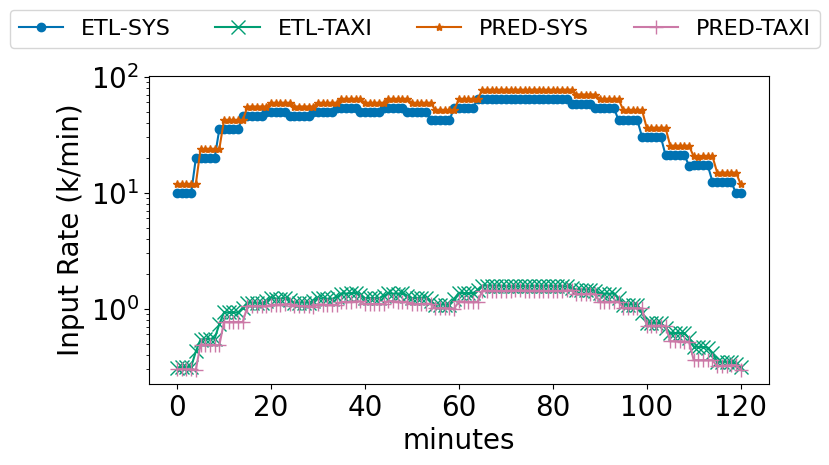

In [74]:

def draw_fig(data_latency, data_throughput=None, name=None):
    # draw latency
    # draw throughput
    plt.figure(figsize=(8,4))
    etl_sys = [x*20/1000 for i, x in enumerate(data_throughput) if i % 4 == 0][:121]
    etl_taxi = [x /1000 for i, x in enumerate(data_throughput) if i % 4 == 1][:121]
    pred_sys = [x*20/1000 for i, x in enumerate(data_throughput) if i % 4 == 2][:121]
    pred_taxi = [x/1000 for i, x in enumerate(data_throughput) if i % 4 == 3][:121]
    x = range(0, len(etl_sys))

    plt.plot(x, etl_sys, label="ETL-SYS", marker='o', )
    plt.plot(x, etl_taxi, label="ETL-TAXI", marker='x',  markersize="10")
    plt.plot(x, pred_sys, label="PRED-SYS", marker='*', )
    plt.plot(x, pred_taxi, label="PRED-TAXI", marker='+',  markersize="10")
    plt.legend(bbox_to_anchor=(1.1, 1.25), ncol=4, fontsize=16,)
    plt.xlabel("minutes")
    plt.ylabel("Input Rate (k/min)")
    plt.yscale('log')
    if name:
        plt.savefig(name+'.pdf', bbox_inches='tight')
        files.download(name+'.pdf')
    plt.show()
draw_fig(perf_data['latency']['Beaver'], perf_data['throughput']['Beaver'], "inputRate")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

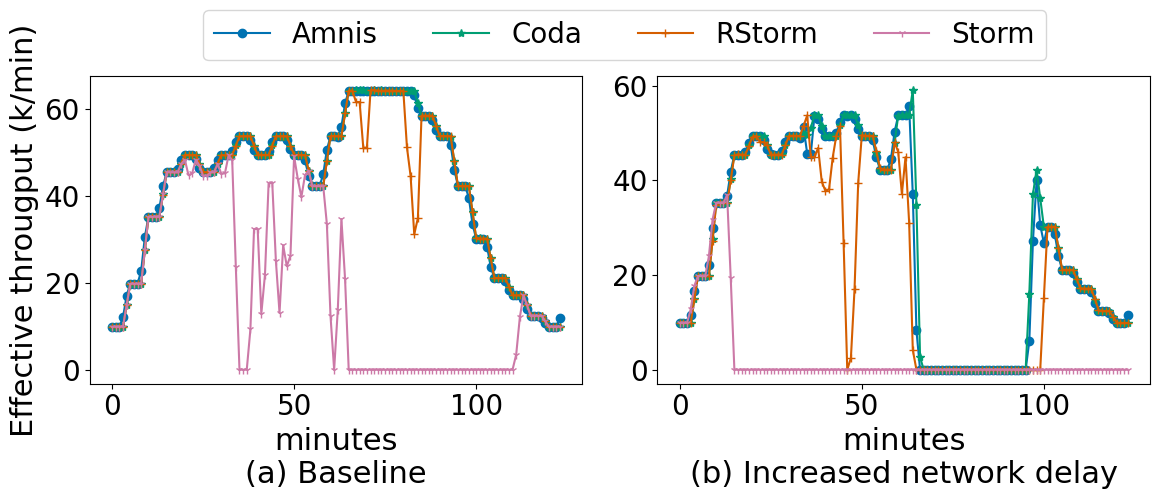

In [106]:
# motivation figure
def draw_throughputOne(data, savedname, is_download=None):
    # draw latency
    method_name = ['Amnis', 'Coda', 'RStorm', 'Storm']
    name = "ETL-SYS"
    value = data[name]
    plt.figure(figsize=(8,6))
    lines = []
    for method in method_name:
        y = value[method]
        x = range(0, len(y))
        line = plt.plot(x, y, label=method, marker=marker[method])
        lines.append(line)

    plt.ylabel("Effective throughput (k/min)")
    plt.xlabel('minutes')
    plt.legend(bbox_to_anchor=(1., 1.2), ncol=4, fontsize=17,)
    plt.tight_layout()
    fileName = 'all_{}.pdf'.format(savedname)
    #plt.savefig(fileName, bbox_inches='tight')
    #files.download(fileName)
    plt.show()

def draw_throughputTwo(data1, data2, savedname, is_download=None):
    fig, axs = plt.subplots(1, 2, figsize=(12, 5))
    NAME = "ETL-SYS"
    data = {"(a) Baseline": data1[NAME],
            "(b) Increased network delay": data2[NAME]}

    method_name = ['Amnis', 'Coda', 'RStorm', 'Storm']
    for i, name in enumerate(data.keys()):
        value = data[name]
        lines = []
        for method in method_name:
            y = value[method]
            x = range(0, len(y))
            line = axs[i].plot(x, y, label=method, marker=marker[method])
            lines.append(line)
        if i == 0:
            axs[i].set_ylabel("Effective througput (k/min)", fontsize=22)
        axs[i].set_xlabel('minutes', fontsize=22)
        axs[i].set_title(name, y=-0.35, fontsize=22)
    Line, Label = axs[0].get_legend_handles_labels()
    fig.legend(Line, Label,  bbox_to_anchor=(0.9, 1.1), ncol=5)

    fig.tight_layout()
    fileName = 'all_{}.pdf'.format(savedname)
    plt.savefig(fileName, bbox_inches='tight')
    files.download(fileName)
    plt.show()


result = processing_data(perf_data['successTuple'], True)
result1 = processing_data(perf_data2['successTuple'], True)
result2 = processing_data(perf_data1['successTuple'], True)

#draw_throughputOne(result, 'motivation1')
#draw_throughputOne(result1, 'motivation2')
#draw_throughputOne(result2, 'motivation3')
draw_throughputTwo(result, result2, 'motivation')




<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

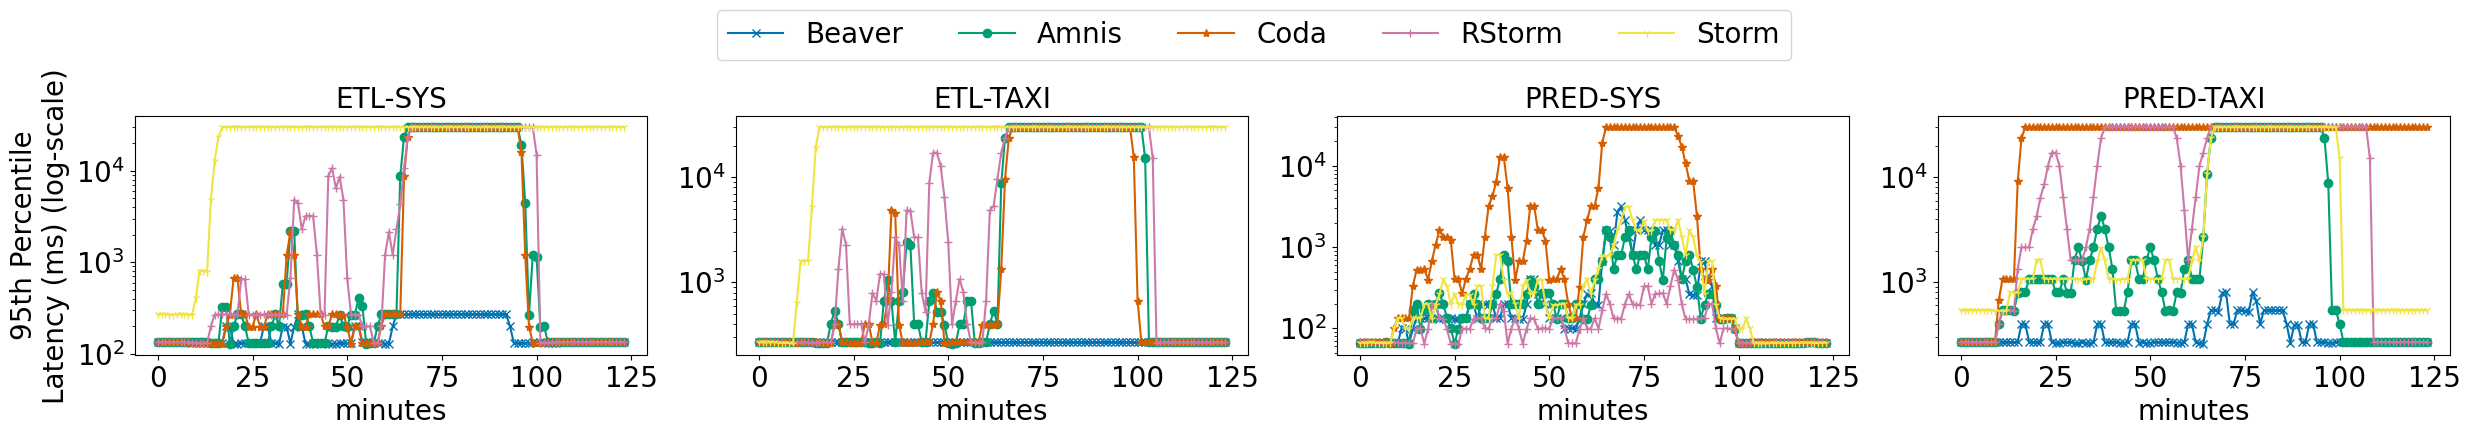

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

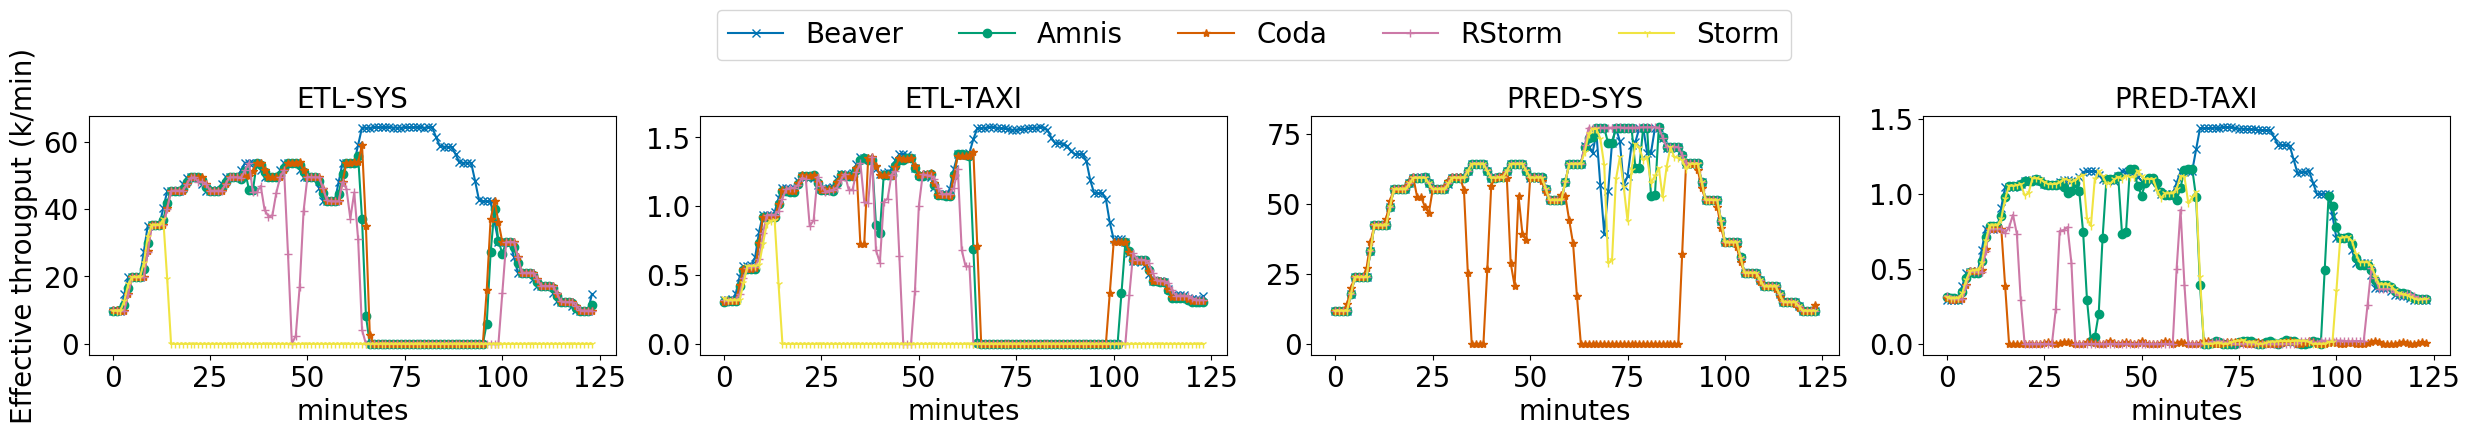

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

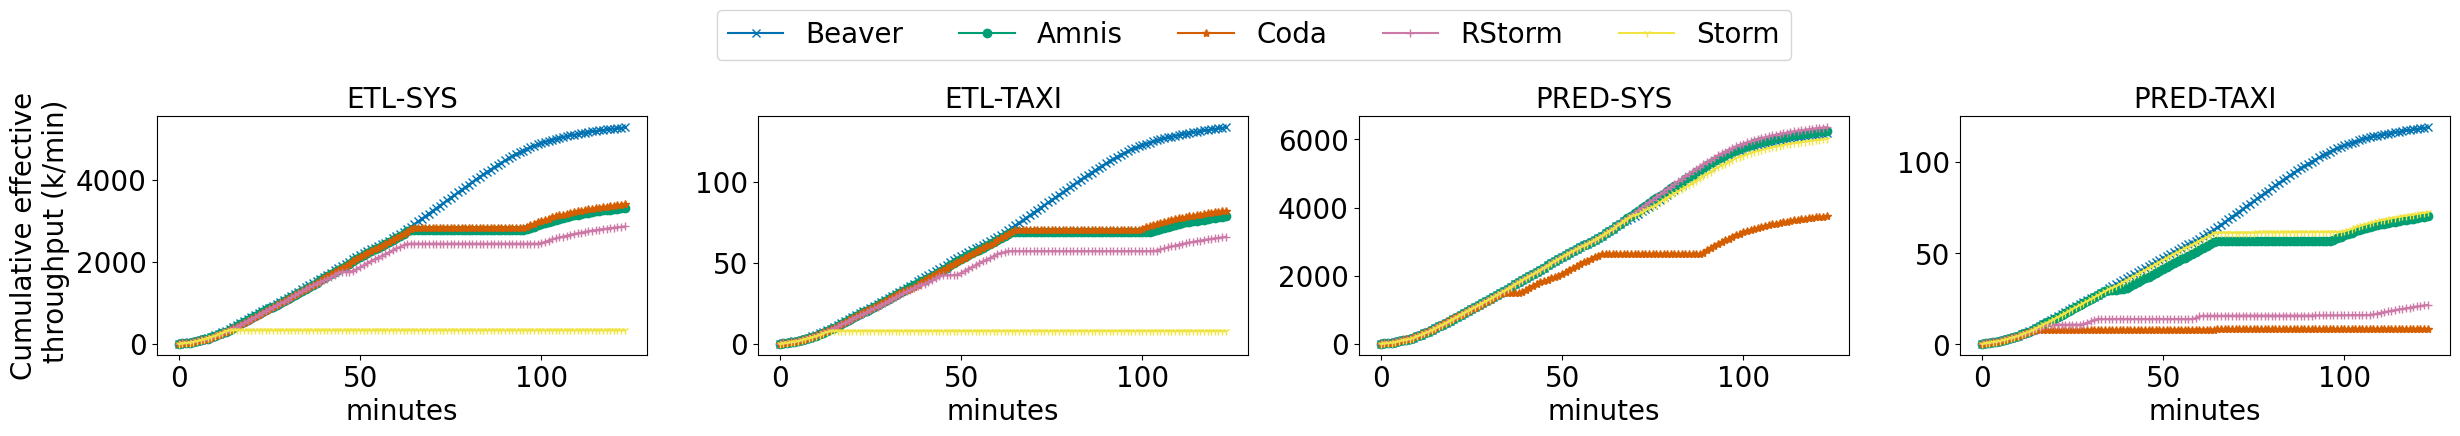

In [126]:
def draw_throughput(data, savedname, is_download=None):
    # draw latency
    method_name = ['Beaver', 'Amnis', 'Coda', 'RStorm', 'Storm']

    fig, axs = plt.subplots(1, 4, figsize=(25, 4))
    for i, name in enumerate(data.keys()):
        value = data[name]
        #plt.figure(figsize=(8,8))
        lines = []
        for method in method_name:
            y = value[method]
            x = range(0, len(y))
            line = axs[i].plot(x, y, label=method, marker=marker[method])
            lines.append(line)
        #axs[i].set_ylim(10, 1005)

        if i == 0:
            if savedname == "Throughput":
                axs[i].set_ylabel("{} (k/min)".format(savedname))
            elif savedname == "Latency":
                axs[i].set_ylabel("95th Percentile\nLatency (ms) (log-scale)")
            else:
                axs[i].set_ylabel("Effective througput (k/min)")
        if savedname == "Latency":
            axs[i].set_yscale('log')
        axs[i].set_xlabel('minutes')
        axs[i].set_title(name, y=1.)
    Line, Label = axs[0].get_legend_handles_labels()
    fig.legend(Line, Label,  bbox_to_anchor=(0.73, 1.15), ncol=5)

    fig.tight_layout()
    fileName = 'all_{}.pdf'.format(savedname)
    plt.savefig(fileName, bbox_inches='tight')
    files.download(fileName)
    plt.show()

def draw_throughputACC(data, savedname, is_download=None):
    # draw latency
    method_name = ['Beaver', 'Amnis', 'Coda', 'RStorm', 'Storm']

    fig, axs = plt.subplots(1, 4, figsize=(25, 4))
    for i, name in enumerate(data.keys()):
        value = data[name]
        #plt.figure(figsize=(8,8))
        lines = []
        for method in method_name:
            y = value[method]
            x = range(0, len(y))
            y = [sum(y[0:a:1]) for a in range(0, len(y)+1)][1:]
            line = axs[i].plot(x, y, label=method, marker=marker[method])
            lines.append(line)
        #axs[i].set_ylim(10, 1005)

        if i == 0:
            if savedname == "Throughput":
                axs[i].set_ylabel("{} (k/min)".format(savedname))
            elif savedname == "Latency":
                axs[i].set_ylabel("95th Percentile\nLatency (ms) (log-scale)")
            else:
                axs[i].set_ylabel("Cumulative effective\n throughput (k/min)")
        if savedname == "Latency":
            axs[i].set_yscale('log')
        axs[i].set_xlabel("minutes")
        axs[i].set_title(name, y=1.)
    Line, Label = axs[0].get_legend_handles_labels()
    fig.legend(Line, Label,  bbox_to_anchor=(0.73, 1.15), ncol=5)

    fig.tight_layout()
    fileName = 'all_acc_{}.pdf'.format(savedname)
    plt.savefig(fileName, bbox_inches='tight')
    files.download(fileName)
    plt.show()

result1 = processing_data(perf_data['latency'])
draw_throughput(result1, 'Latency')

result2 = processing_data(perf_data['throughput'], True)
#draw_throughput(result2, 'Throughput')

#draw_throughputACC(result2, 'Throughput')

result2 = processing_data(perf_data['successTuple'], True)
draw_throughput(result2, 'successTuple')

draw_throughputACC(result2, 'successTuple')

In [130]:
resourceList = ["CPU", "Network_Trans", "Network_Rec", "Mem", "NODE_CPU", "NODE_Network_Trans", "NODE_Network_Rec", "NODE_Mem"]
sys_data = {}
for app in ["Amnis", "Beaver", "Coda", "RStorm", "Storm"]:
    data = pd.read_csv('{}{}.txt'.format(dataFolder1, app), header=None)
    data = data.iloc[:,:]
    sys_data[app] = {
        "CPU": data[0:12].values.tolist(),
        "Network_Trans": data[12:24].values.tolist(),
        "Network_Rec": data[24:36].values.tolist(),
        "Mem": data[36:48].values.tolist(),
        "NODE_CPU": data[48:56].values.tolist(),
        "NODE_Network_Trans": data[56:64].values.tolist(),
        "NODE_Network_Rec": data[64:72].values.tolist(),
        "NODE_Mem": data[72:80].values.tolist()
    }

all_data = {}

for res in resourceList:
  all_data[res] = {}
  for app in ["Amnis", "Beaver", "Coda", "RStorm", "Storm"]:
    all_data[res][app] = sys_data[app][res]



In [131]:
all_data['NODE_Network'] = {}
all_data['Network'] = {}

for res in resourceList:
  if "NODE_Network" in res:
      for app in ["Amnis", "Beaver", "Coda", "RStorm", "Storm"]:
          tmp = all_data[res][app]
          all_data[res][app] = [ list(x*8/1000000 if i != 0 else x for i,x in enumerate(y)) for y in tmp]
  if "NODE_Mem" in res:
      for app in ["Amnis", "Beaver", "Coda", "RStorm", "Storm"]:
          tmp = all_data[res][app]
          for i, edge in enumerate(all_data[res][app]):
              if 'core' in edge[0]:
                  all_data[res][app][i] = [ x*16 if i != 0 else x for i,x in enumerate(edge)]
              if 'worker' in edge[0]:
                  all_data[res][app][i] = [ x*8 if i != 0 else x for i,x in enumerate(edge)]
              if 'edge' in edge[0]:
                  all_data[res][app][i] = [ x*4 if i != 0 else x for i,x in enumerate(edge)]

for app in ["Amnis", "Beaver", "Coda", "RStorm", "Storm"]:
    a = all_data['NODE_Network_Trans'][app]
    b = all_data['NODE_Network_Rec'][app]
    name = [x[0] for x in a]
    all_data['NODE_Network'][app] = [ list(x1+x2 for x1, x2 in zip(x, y)) for x, y in zip(a, b)]
    for i in range(len(a)):
        all_data['NODE_Network'][app][i][0] = name[i]

for app in ["Amnis", "Beaver", "Coda", "RStorm", "Storm"]:
    a = all_data['Network_Trans'][app]
    b = all_data['Network_Rec'][app]
    name = [x[0] for x in a]
    all_data['Network'][app] = [ list(x1+x2 for x1, x2 in zip(x, y)) for x, y in zip(a, b)]
    for i in range(len(a)):
        all_data['Network'][app][i][0] = name[i]


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

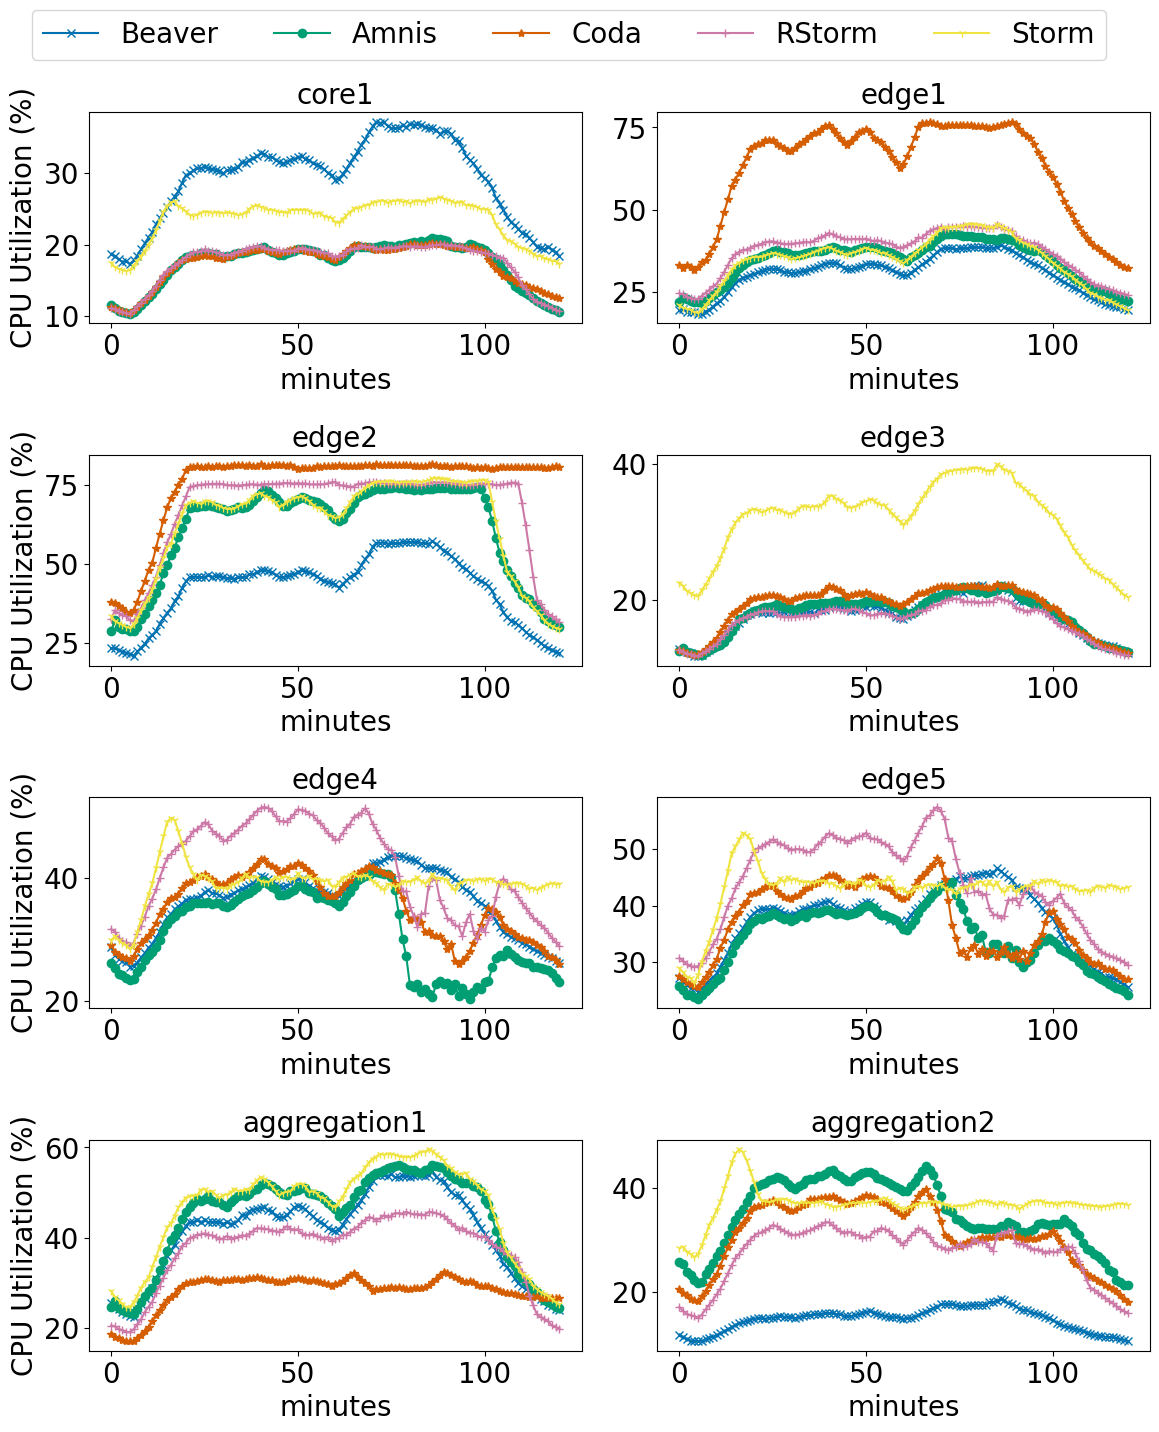

In [132]:

def draw_resource(data, resourceName, is_download=True, appName=None):
    marker = {"Amnis": 'o', "Beaver": 'x', "Coda": '*', "RStorm": '+', "Storm": '1'}

    value = data[resourceName]
    length = 8
    #print(value)
    fig, axs = plt.subplots(4, 2, figsize=(12, 14))
    for idx in range(length):
        #if appName and appName not in value['Amnis'][idx][0:1][0]:
        #    continue
        i, j = idx//2, idx%2
        x = range(0, len(value['Amnis'][idx][1:]))
        for method in ["Beaver", "Amnis", "Coda", "RStorm", "Storm"]:
            y = value[method][idx][1:]
            if resourceName == "NODE_CPU":
                y = [a*100 for a in y]
            axs[i, j].plot(x, y, label=method, marker=marker[method])
        name = value['Amnis'][idx][0:1][0]
        if name in "worker1":
            name = "aggregation1"
        if name in "worker2":
            name = "aggregation2"
        if name in "core":
            name = "core1"
        axs[i, j].set_title(name)
        axs[i, j].set_xlabel('minutes')
        if j == 0:
            if resourceName == "NODE_CPU":
                axs[i, j].set_ylabel("CPU Utilization (%)")
            elif resourceName == "NODE_Mem":
                axs[i, j].set_ylabel("Memory Usage (GB)")
            else:
                axs[i, j].set_ylabel("Network R/W (Mbps)")

    Line, Label = axs[0, 0].get_legend_handles_labels()
    fig.legend(Line, Label,  bbox_to_anchor=(0.95, 1.04), ncol=5)

    fig.tight_layout()
    fileName = 'all_{}.pdf'.format(resourceName)
    plt.savefig(fileName, bbox_inches='tight')
    files.download(fileName)
    plt.show()


draw_resource(all_data, "NODE_CPU", is_download=True)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

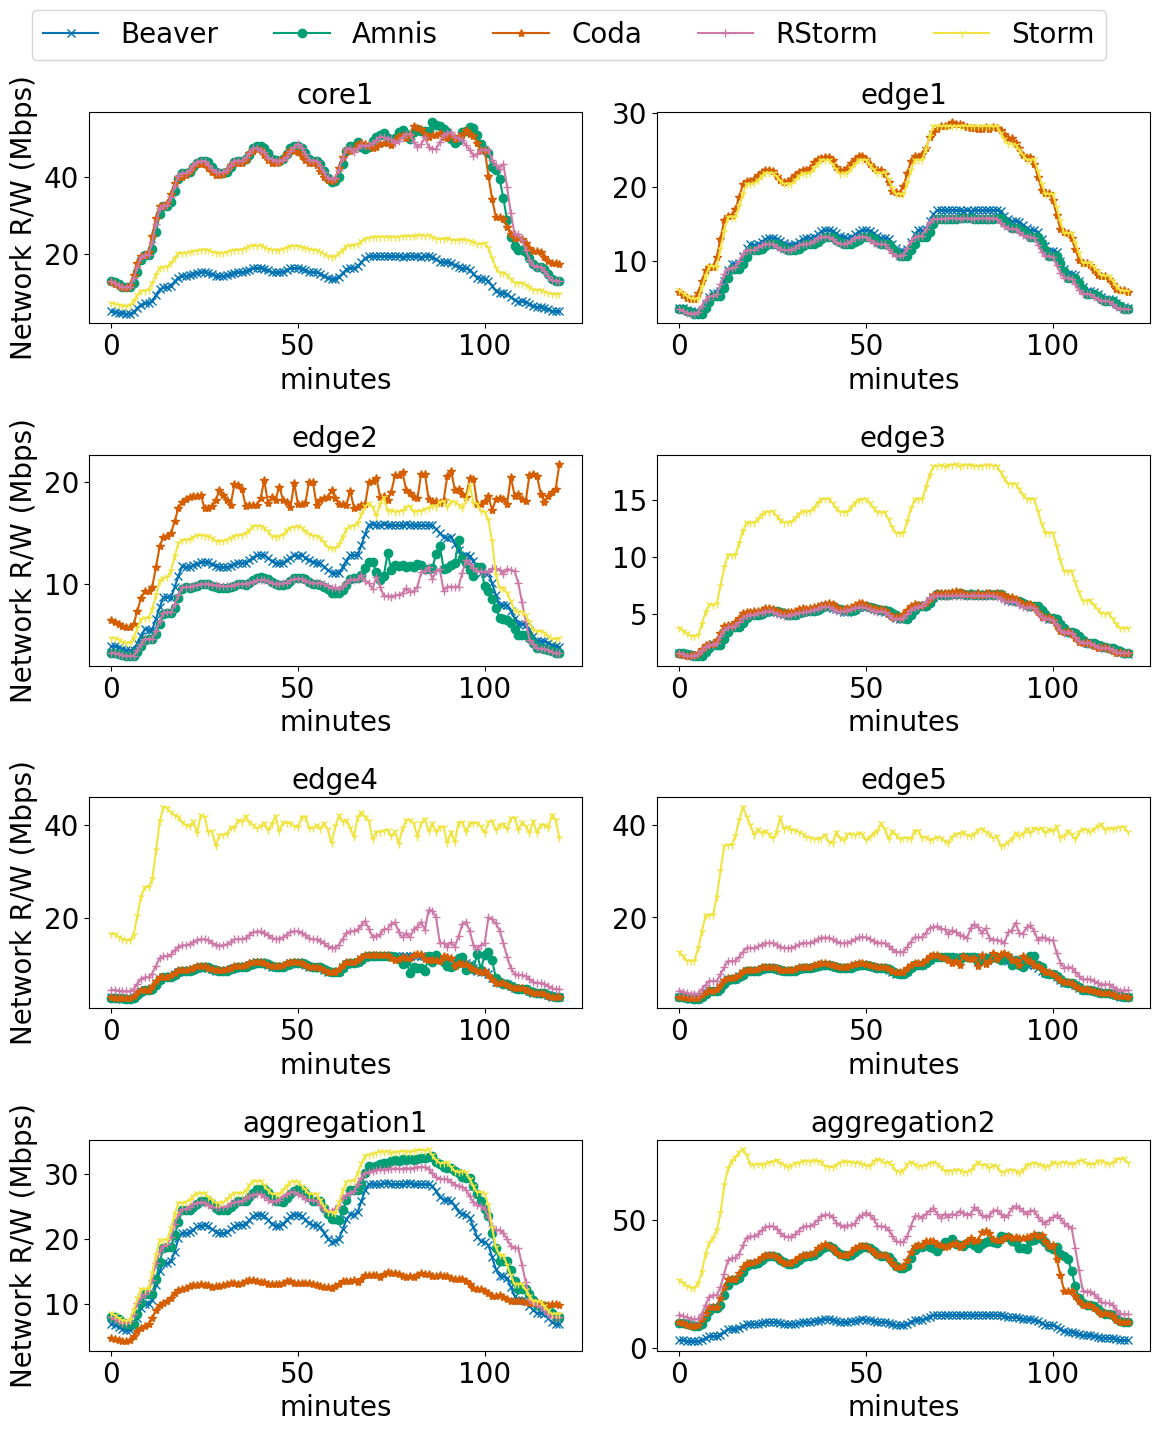

In [133]:
draw_resource(all_data, 'NODE_Network')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

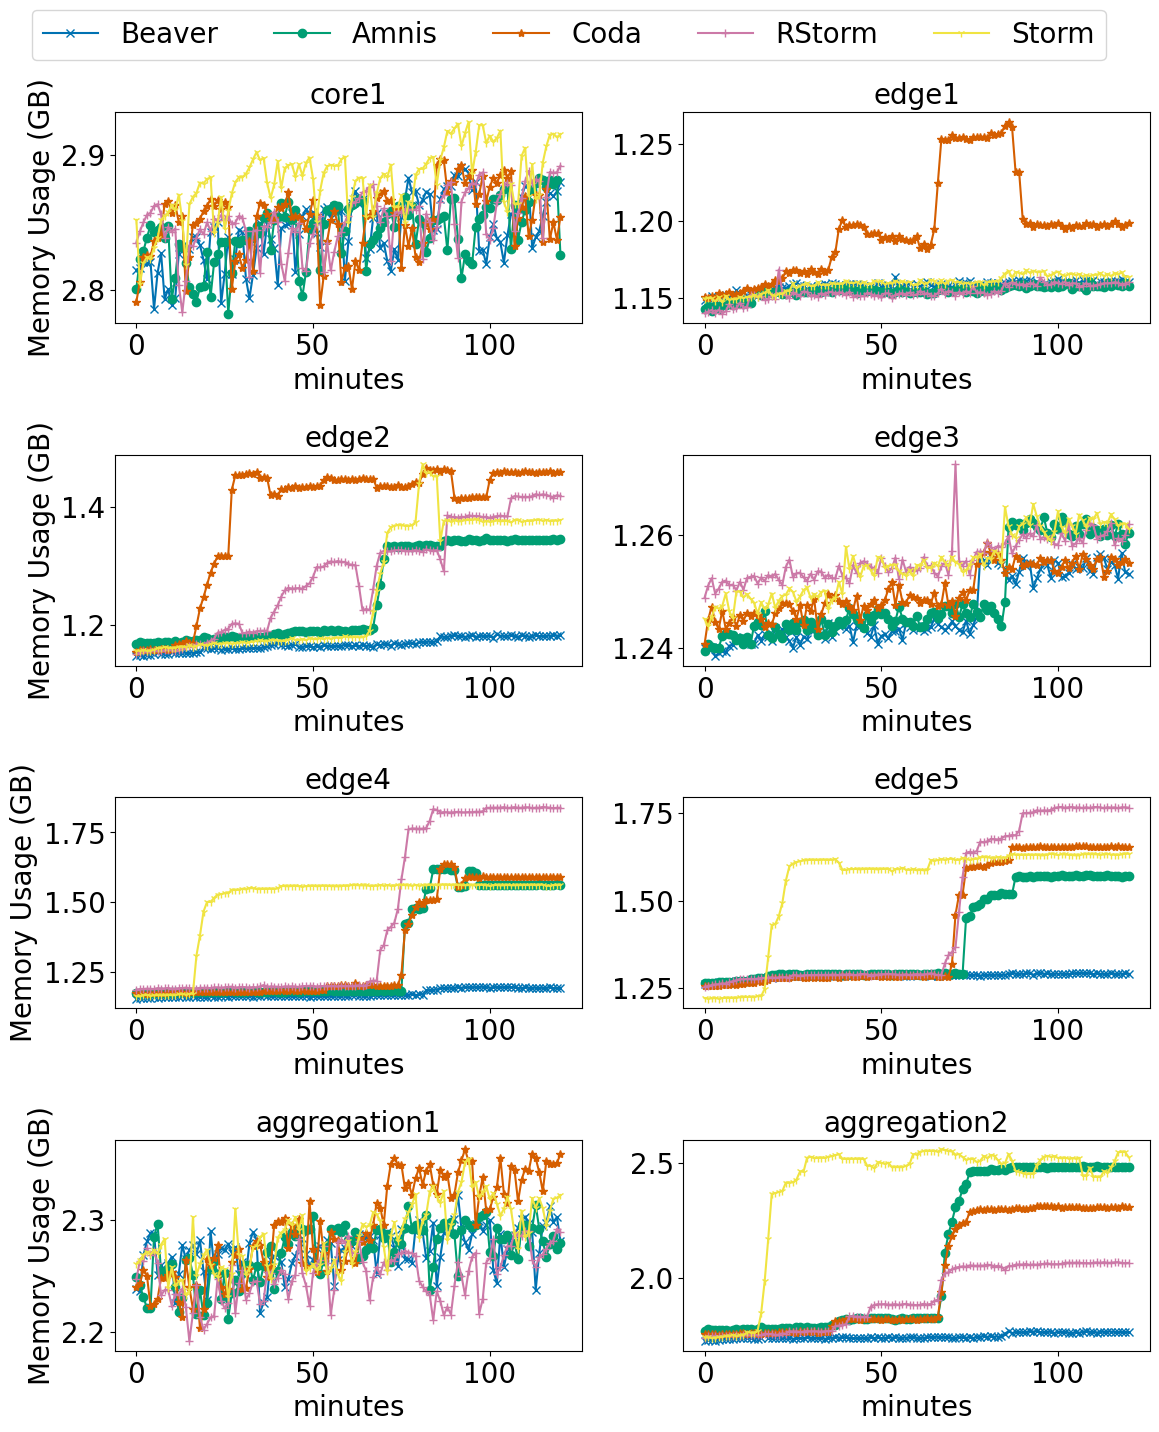

In [134]:

draw_resource(all_data, 'NODE_Mem')


In [23]:
#imports
from google.colab import files
import pandas as pd
import numpy as np
from matplotlib import colors

import seaborn as sns
from datetime import datetime
import matplotlib.pyplot as plt
plt.style.use('seaborn-v0_8-colorblind')



#Hardcoded confusion matrix

def drawHeatMap(conf_matrix1=None, conf_matrix2=None, operator=None, labelName=['edge1', 'worker1', 'core1'], fileName=""):
    operator = operator[::-1]
    conf_matrix1 = conf_matrix1[::-1]
    conf_matrix2 = conf_matrix2[::-1]
    #Create pandas dataframe with confusion matrix
    methods = ["Storm", "RStorm", "Amnis", "Coda", "Beaver"]

    fig, axs = plt.subplots(1, 3, figsize=(6, 4), gridspec_kw={'width_ratios':[1,1,0.08]})
    #axs[0].get_shared_y_axes().join(axs[1])

    conf_matrix_df1 = pd.DataFrame(conf_matrix1,columns=methods,index=operator)
    conf_matrix_df2 = pd.DataFrame(conf_matrix2,columns=methods,index=operator)
    #Plot confusion matrix heatmap
    #sns.set (rc = {'figure.figsize':(5, 5)})
    #cmap = sns.color_palette([palette_tab10[0], palette_tab10[1], palette_tab10[7]], as_cmap=True)

    ax1 = sns.heatmap(conf_matrix_df1,
                      #cmap=cmap,
                      fmt='.5g', linewidths=1, linecolor='lightgray',
            annot_kws={
                'fontsize': 20,
                'fontweight': 'bold',
                'fontfamily': 'serif'
            },
            vmax=3,
            cbar=False,
            ax=axs[0])
    ax1.set_xticklabels(ax1.get_xmajorticklabels(), fontsize = 20 )
    ax1.set_yticklabels(ax1.get_ymajorticklabels(), fontsize = 20)

    ax1.set_xlabel('methods', fontsize=20)
    ax1.xaxis.set_label_coords(1.05, -0.35)
    ax1.set_title(fileName+'-SYS', fontsize = 20)
    ax2 = sns.heatmap(conf_matrix_df2,
                      #cmap=cmap,
                      fmt='.5g', linewidths=1, linecolor='lightgray',
            annot_kws={
                'fontsize': 20,
                'fontweight': 'bold',
                'fontfamily': 'serif'
            },
            vmax=3,
            cbar_ax=axs[2],
            ax=axs[1])


    ax2.set_xticklabels(ax2.get_xmajorticklabels(), fontsize = 20)
    ax2.set_ylabel('')
    ax2.set_yticks([])
    ax2.set_title(fileName+'-TAXI', fontsize = 20)
    for ax in [ax1, ax2]:
        tl = ax.get_xticklabels()
        ax.set_xticklabels(tl, rotation=60)

    # Manually specify colorbar labelling after it's been generated
    colorbar = ax2.collections[0].colorbar
    colorbar.set_ticks([1.33, 2, 2.66])
    colorbar.set_ticklabels(labelName, fontsize=20)
    colorbar.ax.tick_params(labelsize=20)
    # here set the labelsize by 20
    fileName = '{}.pdf'.format(fileName+"Layout")
    plt.savefig(fileName, bbox_inches='tight')
    files.download(fileName)
    plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

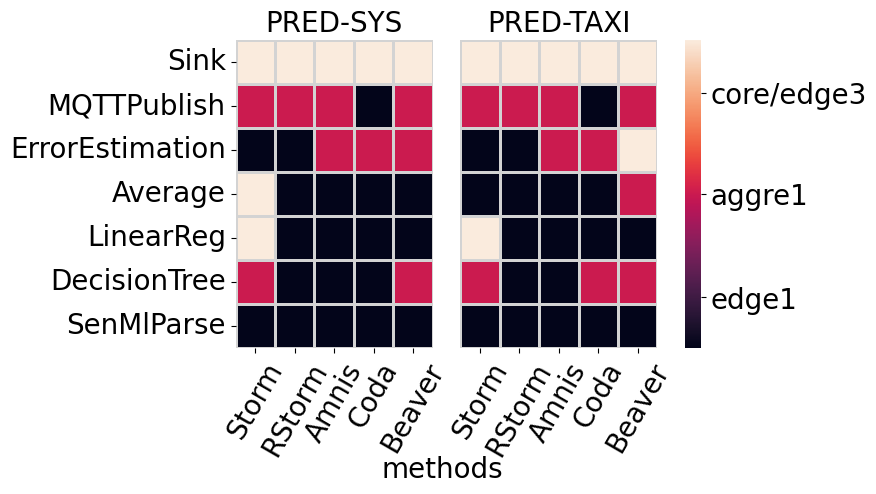

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

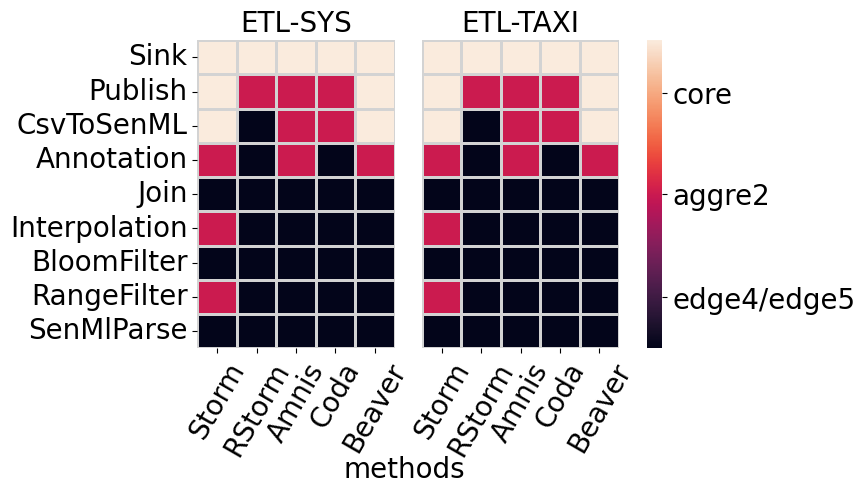

In [24]:
# PREDICT-sys
conf_matrix1 = [
    [1,1,1,1,1],
    [2,1,1,1,2],
    [3,1,1,1,1],
    [3,1,1,1,1],
    [1,1,2,2,2],
    [2,2,2,1,2],
    [3, 3, 3, 3, 3]
]

# PREDICT-Taxi
conf_matrix2 = [
    [1,1,1,1,1],
    [2,1,1,2,2],
    [3,1,1,1,1],

    [1,1,1,1,2],
    [1,1,2,2,3],
    [2,2,2,1,2],
    [3, 3, 3, 3, 3]
]

operator = ['SenMlParse', 'DecisionTree', 'LinearReg', 'Average',  'ErrorEstimation', 'MQTTPublish', 'Sink']
#operator = ['SenMlParse', 'RangeFilter', 'BloomFilter', 'Interpolation', 'Join', 'Annotation', 'CsvToSenML', 'Publish', 'Sink']

#operator = range(7)
drawHeatMap(conf_matrix1, conf_matrix2, operator, ['edge1', 'aggre1', 'core/edge3'], "PRED",)

# ETL-sys
conf_matrix1 = [
    [1,1,1,1,1],
    [2,1,1,1,1],
    [1,1,1,1,1],
    [2,1,1,1,1],
    [1,1,1,1,1],
    [2,1,2,1,2],
    [3,1,2, 2,3],
    [3,2,2,2,3],
    [3,3,3,3,3],
]

# ETL-Taxi
conf_matrix2 = [
    [1,1,1,1,1],
    [2,1,1,1,1],
    [1,1,1,1,1],
    [2,1,1,1,1],
    [1,1,1,1,1],
    [2,1,2,1,2],
    [3,1,2, 2,3],
    [3,2,2,2,3],
    [3,3,3,3,3],
]
operator = ['SenMlParse', 'RangeFilter', 'BloomFilter', 'Interpolation', 'Join', 'Annotation', 'CsvToSenML', 'Publish', 'Sink']
#operator = range(9)

drawHeatMap(conf_matrix1,conf_matrix2, operator, ['edge4/edge5', 'aggre2', 'core'], "ETL")